In [3]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv(r"C:\Users\colti\OneDrive\Documents\Sony Open 17-25\raw_pga_6_2017.csv")

In [4]:
df2 = pd.read_csv(r"C:\Users\colti\OneDrive\Documents\Sony Open 17-25\raw_pga_6_2018.csv")

In [5]:
df3 = pd.read_csv(r"C:\Users\colti\OneDrive\Documents\Sony Open 17-25\raw_pga_6_2019.csv")

In [6]:
df4 = pd.read_csv(r"C:\Users\colti\OneDrive\Documents\Sony Open 17-25\raw_pga_6_2020.csv")

In [7]:
df5 = pd.read_csv(r"C:\Users\colti\OneDrive\Documents\Sony Open 17-25\raw_pga_6_2021.csv")

In [8]:
df6 = pd.read_csv(r"C:\Users\colti\OneDrive\Documents\Sony Open 17-25\raw_pga_6_2022.csv")

In [9]:
df7 = pd.read_csv(r"C:\Users\colti\OneDrive\Documents\Sony Open 17-25\raw_pga_6_2023.csv")

In [10]:
df8 = pd.read_csv(r"C:\Users\colti\OneDrive\Documents\Sony Open 17-25\raw_pga_6_2024.csv")

In [11]:
df9 = pd.read_csv(r"C:\Users\colti\OneDrive\Documents\Sony Open 17-25\raw_pga_6_2025.csv")

In [12]:
sony_hist = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9])
sony_hist

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,...,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,eagles_or_better,birdies,pars,bogies,doubles_or_worse
0,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Thomas, Justin",14139,1,1,...,0.800,28.089,18.502,10,0,2,8,7,1,0
1,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Thomas, Justin",14139,1,2,...,0.500,26.608,25.163,7,3,1,7,7,3,0
2,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Thomas, Justin",14139,1,3,...,1.000,49.394,23.732,6,2,0,5,13,0,0
3,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Thomas, Justin",14139,1,4,...,0.800,47.151,25.242,6,2,0,6,11,1,0
4,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Rose, Justin",6093,2,1,...,1.000,33.725,25.512,5,3,0,6,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,pga,2025,2025,2025-01-12,Sony Open in Hawaii,6,"Malnati, Peter",14926,CUT,2,...,0.833,59.272,39.567,2,7,0,6,5,5,2
432,pga,2025,2025,2025-01-12,Sony Open in Hawaii,6,"Welsh, Kelly",33133,CUT,1,...,0.429,41.852,46.952,2,11,0,2,8,5,3
433,pga,2025,2025,2025-01-12,Sony Open in Hawaii,6,"Welsh, Kelly",33133,CUT,2,...,0.375,71.210,37.612,0,11,0,0,12,3,3
434,pga,2025,2025,2025-01-12,Sony Open in Hawaii,6,"Campbell, Brian",18628,WD,1,...,0.750,39.257,24.636,3,1,0,4,13,1,0


In [21]:
sony_hist.drop_duplicates(inplace=True)
sony_hist

,tour,year,season,event_completed,event_name,event_id,player_name,dg_id,fin_text,round_num,...,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,eagles_or_better,birdies,pars,bogies,doubles_or_worse
0,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Thomas, Justin",14139,1,1,...,0.800,28.089,18.502,10,0,2,8,7,1,0
1,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Thomas, Justin",14139,1,2,...,0.500,26.608,25.163,7,3,1,7,7,3,0
2,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Thomas, Justin",14139,1,3,...,1.000,49.394,23.732,6,2,0,5,13,0,0
3,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Thomas, Justin",14139,1,4,...,0.800,47.151,25.242,6,2,0,6,11,1,0
4,pga,2017,2017,2017-01-15,Sony Open in Hawaii,6,"Rose, Justin",6093,2,1,...,1.000,33.725,25.512,5,3,0,6,10,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,pga,2025,2025,2025-01-12,Sony Open in Hawaii,6,"Malnati, Peter",14926,CUT,2,...,0.833,59.272,39.567,2,7,0,6,5,5,2
432,pga,2025,2025,2025-01-12,Sony Open in Hawaii,6,"Welsh, Kelly",33133,CUT,1,...,0.429,41.852,46.952,2,11,0,2,8,5,3
433,pga,2025,2025,2025-01-12,Sony Open in Hawaii,6,"Welsh, Kelly",33133,CUT,2,...,0.375,71.210,37.612,0,11,0,0,12,3,3
434,pga,2025,2025,2025-01-12,Sony Open in Hawaii,6,"Campbell, Brian",18628,WD,1,...,0.750,39.257,24.636,3,1,0,4,13,1,0


In [29]:
sony_hist1 = sony_hist[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots', 'eagles_or_better', 'birdies', 'pars', 'bogies', 'doubles_or_worse']]
sony_hist1.describe()

,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,driving_dist,driving_acc,gir,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,eagles_or_better,birdies,pars,bogies,doubles_or_worse
count,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2682.000000,2650.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000,2685.000000
mean,0.287563,0.086155,0.277740,0.139963,0.503868,0.790918,290.898436,0.593242,0.720599,0.676756,54.529447,28.243061,3.372812,3.038734,0.137430,4.187709,11.531844,2.002607,0.140410
std,1.645913,0.916545,1.422254,0.977664,1.864302,2.378897,9.354566,0.141003,0.107512,0.199945,27.647306,5.821419,1.675614,1.778952,0.363318,1.638467,1.966421,1.308146,0.375312
min,-4.674000,-3.788000,-5.843000,-4.912000,-8.156000,-8.476000,252.900000,0.143000,0.333000,0.000000,1.549000,12.407000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000
25%,-0.795000,-0.502000,-0.640000,-0.398000,-0.665000,-0.685000,284.800000,0.500000,0.667000,0.556000,37.707000,24.110000,2.000000,2.000000,0.000000,3.000000,10.000000,1.000000,0.000000
50%,0.250000,0.060000,0.281000,0.264000,0.565000,0.903000,291.000000,0.571000,0.722000,0.667000,49.482000,27.805000,3.000000,3.000000,0.000000,4.000000,12.000000,2.000000,0.000000
75%,1.411000,0.645000,1.210000,0.795000,1.769000,2.321000,297.200000,0.714000,0.778000,0.800000,64.258000,31.816000,4.000000,4.000000,0.000000,5.000000,13.000000,3.000000,0.000000
max,6.871000,3.962000,6.463000,2.993000,6.368000,9.250000,321.000000,1.000000,1.000000,1.000000,294.480000,55.153000,11.000000,14.000000,3.000000,10.000000,17.000000,7.000000,3.000000


In [13]:
sony_hist.isna().sum()

tour                 0
year                 0
season               0
event_completed      0
event_name           0
event_id             0
player_name          0
dg_id                0
fin_text             0
round_num            0
course_name          0
course_num           0
course_par           0
start_hole           0
teetime              0
round_score          0
sg_putt              0
sg_arg               0
sg_app               0
sg_ott               0
sg_t2g               0
sg_total             0
driving_dist         0
driving_acc          0
gir                  0
scrambling           5
prox_rgh            44
prox_fw              0
great_shots          0
poor_shots           0
eagles_or_better     0
birdies              0
pars                 0
bogies               0
doubles_or_worse     0
dtype: int64

In [14]:
scrambling = sony_hist['scrambling']
scrambling_mean = scrambling.mean()
scrambling.fillna(scrambling_mean, inplace=True)
sony_hist['scrambling'] = scrambling

In [15]:
sony_hist.isna().sum()

tour                 0
year                 0
season               0
event_completed      0
event_name           0
event_id             0
player_name          0
dg_id                0
fin_text             0
round_num            0
course_name          0
course_num           0
course_par           0
start_hole           0
teetime              0
round_score          0
sg_putt              0
sg_arg               0
sg_app               0
sg_ott               0
sg_t2g               0
sg_total             0
driving_dist         0
driving_acc          0
gir                  0
scrambling           0
prox_rgh            44
prox_fw              0
great_shots          0
poor_shots           0
eagles_or_better     0
birdies              0
pars                 0
bogies               0
doubles_or_worse     0
dtype: int64

In [16]:
prox_rgh = sony_hist['prox_rgh']
prox_rgh_mean = prox_rgh.mean()
prox_rgh.fillna(prox_rgh_mean, inplace=True)
sony_hist['prox_rgh'] = prox_rgh

In [45]:
sony_hist.isna().sum()

tour                0
year                0
season              0
event_completed     0
event_name          0
event_id            0
player_name         0
dg_id               0
fin_text            0
round_num           0
course_name         0
course_num          0
course_par          0
start_hole          0
teetime             0
round_score         0
sg_putt             0
sg_arg              0
sg_app              0
sg_ott              0
sg_t2g              0
sg_total            0
driving_dist        0
driving_acc         0
gir                 0
scrambling          0
prox_rgh            0
prox_fw             0
great_shots         0
poor_shots          0
eagles_or_better    0
birdies             0
pars                0
bogies              0
doubles_or_worse    0
dtype: int64

In [17]:
print(sony_hist.columns.tolist())

['tour', 'year', 'season', 'event_completed', 'event_name', 'event_id', 'player_name', 'dg_id', 'fin_text', 'round_num', 'course_name', 'course_num', 'course_par', 'start_hole', 'teetime', 'round_score', 'sg_putt', 'sg_arg', 'sg_app', 'sg_ott', 'sg_t2g', 'sg_total', 'driving_dist', 'driving_acc', 'gir', 'scrambling', 'prox_rgh', 'prox_fw', 'great_shots', 'poor_shots', 'eagles_or_better', 'birdies', 'pars', 'bogies', 'doubles_or_worse']


In [23]:
sony_hist.corr(numeric_only=True)

,year,season,event_id,dg_id,round_num,course_num,course_par,start_hole,round_score,sg_putt,...,scrambling,prox_rgh,prox_fw,great_shots,poor_shots,eagles_or_better,birdies,pars,bogies,doubles_or_worse
year,1.000000,1.000000,NaN,0.415119,0.005326,NaN,NaN,-0.012170,-0.015641,-0.000012,...,0.030570,0.040662,0.048050,0.026768,0.002420,-0.004233,-0.011301,0.038045,-0.030272,-0.019533
season,1.000000,1.000000,NaN,0.415119,0.005326,NaN,NaN,-0.012170,-0.015641,-0.000012,...,0.030570,0.040662,0.048050,0.026768,0.002420,-0.004233,-0.011301,0.038045,-0.030272,-0.019533
event_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dg_id,0.415119,0.415119,NaN,1.000000,-0.020016,NaN,NaN,0.004160,0.066257,-0.012520,...,-0.040682,0.026213,0.041539,0.048955,0.072883,-0.014861,-0.015514,-0.043266,0.057074,0.063360
round_num,0.005326,0.005326,NaN,-0.020016,1.000000,NaN,NaN,-0.053443,-0.166865,0.000029,...,0.083139,-0.033666,-0.133558,-0.044535,-0.066611,0.030286,0.109360,0.019729,-0.130934,-0.070984
course_num,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
course_par,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
start_hole,-0.012170,-0.012170,NaN,0.004160,-0.053443,NaN,NaN,1.000000,0.045400,-0.015599,...,-0.022436,-0.003862,0.038052,0.006294,0.049495,0.011222,-0.032049,-0.008549,0.036096,0.025105
round_score,-0.015641,-0.015641,NaN,0.066257,-0.166865,NaN,NaN,0.045400,1.000000,-0.589772,...,-0.447877,0.151439,0.439132,-0.452569,0.606572,-0.177276,-0.720041,-0.003678,0.696709,0.450598
sg_putt,-0.000012,-0.000012,NaN,-0.012520,0.000029,NaN,NaN,-0.015599,-0.589772,1.000000,...,0.367668,0.019225,0.042687,0.398531,-0.386936,0.062819,0.523307,-0.103953,-0.412308,-0.136939


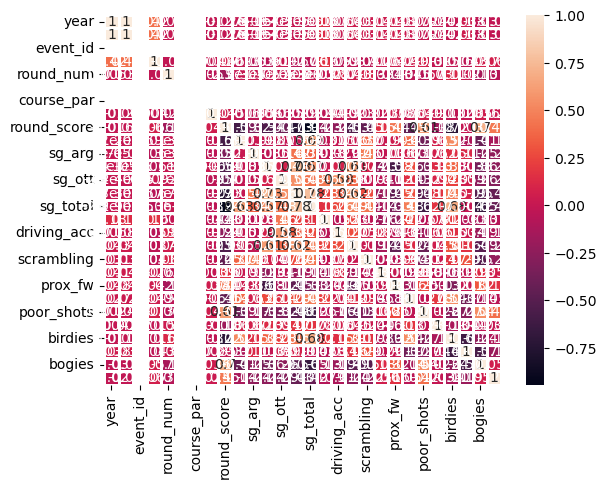

In [21]:
sns.heatmap(sony_hist.corr(numeric_only=True), linewidths=2, annot=True);

In [24]:
x = sony_hist[['sg_putt', 'sg_arg', 'sg_app', 'sg_ott']]
y = sony_hist[['round_score']]

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=65)

In [26]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [27]:
print("Intercept: ", lm.intercept_) #b
print("Slope: ", lm.coef_) #m

Intercept:  [68.79162877]
Slope:  [[-1.00563632 -1.0079439  -1.00640529 -1.00181739]]


In [28]:
coef_df = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": lm.coef_.flatten()  
}).sort_values(by="Coefficient", ascending=False)

print("Intercept:", lm.intercept_) 
print(coef_df)

Intercept: [68.79162877]
   Feature  Coefficient
3   sg_ott    -1.001817
0  sg_putt    -1.005636
2   sg_app    -1.006405
1   sg_arg    -1.007944


In [29]:
y_pred = lm.predict(x_test)

In [30]:
varian = metrics.explained_variance_score(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)

print("Variance:", varian)
print("R2: ", r2)
print('MSE', mse)

Variance: 0.893465151997697
R2:  0.8931946645473411
MSE 0.8496544316173321


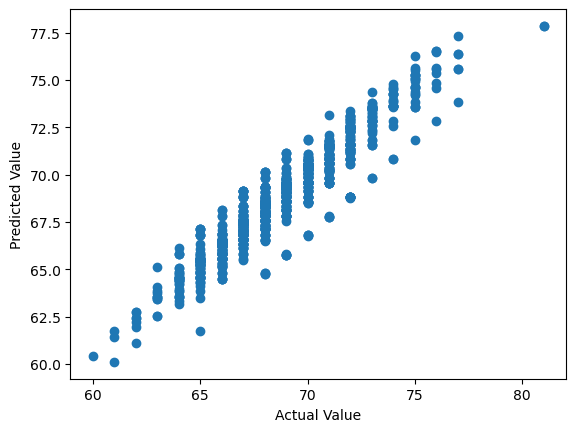

In [31]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred);
plt.xlabel("Actual Value");
plt.ylabel("Predicted Value");